# Exam 3 (10 points):

## Please put your name into the filename you submit.
#### For example, my exam file will be 'WenweiZheng-Exam3.ipynb'

### Note
You are free to use previous notes.  However google or discussing with the other people is not allowed.

## Q1

#### Please run the code below to generate the data first and then finish the question below

In [30]:
import numpy as np
import pandas as pd
from IPython.display import display

name=['Michael','Logan','Carter','Avery','Jayden','Madison','Riley','Julian','Hunter','Emma','Olivia','Noah']
exam1=np.random.randint(30,100,size=12)
exam2=np.random.randint(30,100,size=12)
qz1=np.random.randint(30,100,size=12)
qz2=np.random.randint(30,100,size=12)
hw1=np.random.randint(30,100,size=12)
hw2=np.random.randint(30,100,size=12)
hw3=np.random.randint(30,100,size=12)
hw4=np.random.randint(30,100,size=12)
project=np.random.randint(30,100,size=12)

res=list(zip(hw1,hw2,hw3,hw4,qz1,qz2,exam1,exam2,project))
df=pd.DataFrame(data=res,columns=['HW1','HW2','HW3','HW4','QZ1','QZ2','Exam1','Exam2','Project'])
df.index=name
df.to_csv('data.csv')
display(df)

,HW1,HW2,HW3,HW4,QZ1,QZ2,Exam1,Exam2,Project
Michael,55,72,36,80,40,31,59,58,76
Logan,63,53,70,41,86,55,77,74,63
Carter,78,36,88,63,35,85,44,78,60
Avery,74,42,81,46,73,69,74,54,44
Jayden,37,91,40,64,56,53,47,59,97
Madison,73,52,93,47,92,52,43,90,31
Riley,86,85,90,93,88,30,75,81,48
Julian,41,63,40,34,46,34,78,71,76
Hunter,43,85,84,52,47,60,82,33,52
Emma,52,71,77,82,87,55,86,58,88



## Q.1a (1 point)
#### Since the final hasn't happened yet, can you add one column 'Final' using the average of 'Exam1' and 'Exam 2'?

## Q.1b (1 point)
#### Add one additional column called `Total` for the total of all the grades for each person

## Q.1c (1 point)
#### Can you provide a histogram plot of `Total`?

## Q.1d (2 point)
#### I have provided below the letter grade table in the dictionary `grade`, can you add one extra column and provide a projected grade to each student?



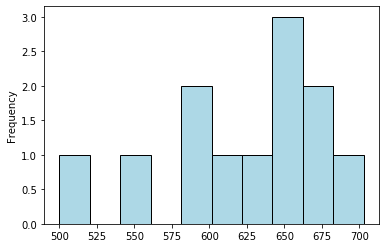

,HW1,HW2,HW3,HW4,QZ1,QZ2,Exam1,Exam2,Project,Final,Total,Grade
Michael,63,30,80,77,31,95,78,79,51,78.5,662.5,C
Logan,76,62,55,43,93,87,33,57,95,45.0,646.0,C
Carter,45,58,31,95,93,61,83,49,95,66.0,676.0,C
Avery,93,38,74,47,84,53,69,99,62,84.0,703.0,C
Jayden,54,32,61,95,72,89,38,82,65,60.0,648.0,C
Madison,52,47,65,85,42,79,63,94,52,78.5,657.5,C
Riley,66,76,67,51,73,80,39,30,78,34.5,594.5,D
Julian,36,61,31,35,60,81,44,40,70,42.0,500.0,F
Hunter,55,48,30,94,51,88,85,36,80,60.5,627.5,D
Emma,71,40,68,40,31,32,84,59,58,71.5,554.5,D


In [20]:
# Q.1a to Q.1d
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('data.csv', index_col=0)

# Q.1a Final is the avg of Exam1 and Exam2
df['Final'] = df.loc[:, 'Exam1':'Exam2'].mean(axis = 1)

# Q.1b Total is the sum of all grades
df['Total'] = df.loc[:, 'HW1':'Final'].sum(axis = 1)

# Q.1c Hisogram plot for Total
df['Total'].plot.hist(edgecolor = 'black', color = 'lightblue')
plt.show()

# Q.1d Assign letter grade
grade={'A':880,'B':760,'C':640,'D':540}

for i in df.index:
    if df.loc[i,'Total'] >= grade['A']:
        df.loc[i,'Grade'] = 'A'
    elif df.loc[i,'Total'] >= grade['B']:
        df.loc[i,'Grade'] = 'B'
    elif df.loc[i,'Total'] >= grade['C']:
        df.loc[i,'Grade'] = 'C'
    elif df.loc[i,'Total'] >= grade['D']:
        df.loc[i,'Grade'] = 'D'
    elif df.loc[i,'Total'] < grade['D']:
        df.loc[i,'Grade'] = 'F'

df

## Q. 1e (Extra credit: 1 point)

#### During the end of the semester, the most common questions would be how much I need to score in the final exam to obtain  A, B, C or D.  
#### Can you write a function using the dataframe and one student's name as input and and print out the final exam points required for every letter grade?
#### The points needed for each letter grade is stored in the dictionary `grade` you can use in your code


#### An example of the output would be like this
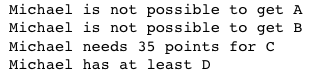
#### which suggests Michael needs more than 100 points for A or B, so it's not possible, but smaller than 0 points for D.

In [65]:
# Q.1e
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv', index_col = 0)

grade = {'A':880,'B':760,'C':640,'D':540}

def estimate(df, name):
    total = df.loc[name].sum()
    for letter in grade.keys():
        required = grade[letter]
        i = required - total
        gap = []
        gap.append(i)
        for i in gap:
            if i > 100:
                print(name + ' is not possible to get ' + letter)
                
            elif 0 < i <= 100:
                print(name + ' needs ' + str(i) + ' points for ' + letter)
               
            elif i <= 0:
                print(name + ' has at least ' + letter)
    
# test
estimate(df,'Michael')
df

Michael is not possible to get A
Michael is not possible to get B
Michael is not possible to get C
Michael needs 33 points for D


,HW1,HW2,HW3,HW4,QZ1,QZ2,Exam1,Exam2,Project
Michael,55,72,36,80,40,31,59,58,76
Logan,63,53,70,41,86,55,77,74,63
Carter,78,36,88,63,35,85,44,78,60
Avery,74,42,81,46,73,69,74,54,44
Jayden,37,91,40,64,56,53,47,59,97
Madison,73,52,93,47,92,52,43,90,31
Riley,86,85,90,93,88,30,75,81,48
Julian,41,63,40,34,46,34,78,71,76
Hunter,43,85,84,52,47,60,82,33,52
Emma,52,71,77,82,87,55,86,58,88


## Q2 (2.5 points)

For the equations below

$ 2x+ 3y + 5z = 7$

$ 2x + 4y + z = 8$

$ 3x + 3y + z = 9$

1. Solve x, y and z with linalg.solve

2. Solve x, y and z with linalg.lstsq

3. Solve the problem using inverse of A

4. Solve the problem using pseudo inverse of A

5. Verify your answer by comparing `A.dot(x)` and `b` for one of the case above

In [69]:
from scipy import linalg
import numpy as np

A = np.array([[2, 3, 5],
              [2, 4, 1],
              [3, 3, 1]])

B = np.array([7, 8, 9])

# 1
x = np.linalg.solve(A, B)
print(x, '\n')

# 2
x, residuals, rank, s = np.linalg.lstsq(A, B, rcond = None)
print(x, '\n')

# 3
x = np.linalg.inv(A).dot(B)
print(x, '\n')

# 4 
x = np.linalg.pinv(A).dot(B)
print(x, '\n')

# 5 test case pinv(A)
print(A.dot(x) == B)

[2.00000000e+00 1.00000000e+00 5.32907052e-17] 

[ 2.00000000e+00  1.00000000e+00 -4.07028813e-16] 

[2.00000000e+00 1.00000000e+00 2.22044605e-16] 

[ 2.00000000e+00  1.00000000e+00 -3.33066907e-16] 

[False False False]


## Q3 (1.5 points)

1. Generate a 5 by 5 random array
2. Obtain the eigenvalues and the eigenvectors of the random array below
3. Print out the `largest` eigenvalue and test the corresponding eigenvector

In [75]:
import numpy as np
from scipy import linalg

a = np.random.rand(5, 5) 
vals, vecs = np.linalg.eig(a)

for i, value in enumerate(vals):
    print('Eigenvector:', vecs[:,i], '\n', 'Eigenvalue:', value, '\n\n')
    

lstVal = []
lstVec = []
for i, value in enumerate(vals):
    lstVal.append(value)
    lstVec.append(vecs[:,i])
    maxInd = lstVal.index(max(lstVal))
    print('The largest Eigenvalue:', max(lstVal), '\n', 'Corresponding Eigenvector:', lstVec[maxInd]) 

Eigenvector: [0.22528693+0.j 0.525641  +0.j 0.56299285+0.j 0.42272359+0.j
 0.42105956+0.j] 
 Eigenvalue: (2.7512768487012753+0j) 


Eigenvector: [-0.45381015+0.j  0.55211003+0.j -0.30991929+0.j  0.37190742+0.j
 -0.50484232+0.j] 
 Eigenvalue: (-0.456595338027719+0j) 


Eigenvector: [ 0.0368883 +0.36772719j -0.29439502+0.00539692j  0.66379729+0.j
 -0.38479998+0.04342756j -0.10470838-0.41853405j] 
 Eigenvalue: (0.009318495240345233+0.42204042201695324j) 


Eigenvector: [ 0.0368883 -0.36772719j -0.29439502-0.00539692j  0.66379729-0.j
 -0.38479998-0.04342756j -0.10470838+0.41853405j] 
 Eigenvalue: (0.009318495240345233-0.42204042201695324j) 


Eigenvector: [-0.75786155+0.j -0.02600163+0.j -0.06147651+0.j  0.62383479+0.j
  0.17894294+0.j] 
 Eigenvalue: (0.20795410225692548+0j) 


The largest Eigenvalue: (2.7512768487012753+0j) 
 Corresponding Eigenvector: [0.22528693+0.j 0.525641  +0.j 0.56299285+0.j 0.42272359+0.j
 0.42105956+0.j]
The largest Eigenvalue: (2.7512768487012753+0j) 
 Correspond

## Q4 (1 point)

Use Monte Carlo method to solve the problem below:

In a Black Jack game, if we use the strategy that we will keep getting cards if we do not have 21 points, what is the probability of getting 21?  I have provided the function of generating new cards (`newcard`), so that you can call it directly.  Please finish the code in the `?` place.

Note the random number generator numpy.random.choice is not that efficient as numpy.random.randint, so please use 1000 trials for testing your code.

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def newcard():
    number=range(1,11)
    # this is the probability for generating a new card with a specific number
    prob=np.array((1.,1,1,1,1,1,1,1,1,5))
    prob/=np.sum(prob)
    card=np.random.choice(number, 1, p=prob)
    return card

n_trial=1000

n_21=0
result=np.zeros(n_trial)
for i in range(n_trial):
    current=0
    while current<21: 
        # get two cards per time
        onehand = (newcard(),newcard()) 
        sum_onehand = sum(onehand)        # but can only calculate the numeric cards
        current += sum_onehand
    if current==21:
        n_21+=1
print('Probability of 21 =',n_21/n_trial)

Probability of 21 = 0.036
